In [6]:
import pandas as pd

import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
sns.set(style="darkgrid")
plt.style.use('seaborn')

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 80)

%matplotlib inline

In [48]:
df_people = pd.read_csv('People.csv')
df_sal = pd.read_csv('Salaries.csv')
df_bat = pd.read_csv('Batting.csv')
df_field = pd.read_csv('Fielding.csv')
df_award = pd.read_csv('AwardsPlayers.csv')
df_allstar = pd.read_csv('AllstarFull.csv')
df_appear = pd.read_csv('Appearances.csv')
df_pitch = pd.read_csv('Pitching.csv')

In [8]:
df_appear.head()

,yearID,teamID,lgID,playerID,G_all,GS,G_batting,G_defense,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
0,1871,TRO,NaN,abercda01,1,1.0,1,1.0,0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0
1,1871,RC1,NaN,addybo01,25,25.0,25,25.0,0,0,0,22,0,3,0,0,0,0,0.0,0.0,0.0
2,1871,CL1,NaN,allisar01,29,29.0,29,29.0,0,0,0,2,0,0,0,29,0,29,0.0,0.0,0.0
3,1871,WS3,NaN,allisdo01,27,27.0,27,27.0,0,27,0,0,0,0,0,0,0,0,0.0,0.0,0.0
4,1871,RC1,NaN,ansonca01,25,25.0,25,25.0,0,5,1,2,20,0,1,0,0,1,0.0,0.0,0.0


In [9]:
df_people.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,2021.0,1.0,22.0,USA,GA,Atlanta,Hank,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,USA,GA,Atlanta,Tommie,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,NaN,NaN,NaN,Don,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,NaN,NaN,NaN,Andy,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [10]:
df_pitch.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,0,0,78,43,23,0,11,1,NaN,7.96,NaN,7,NaN,0,146.0,0,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,0,0,792,361,132,4,37,13,NaN,4.50,NaN,7,NaN,0,1291.0,0,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,0,0,3,8,3,0,0,0,NaN,27.00,NaN,2,NaN,0,14.0,0,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,1,0,639,295,103,3,31,15,NaN,4.35,NaN,20,NaN,0,1080.0,1,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,0,0,27,20,10,0,3,0,NaN,10.00,NaN,0,NaN,0,57.0,0,21,NaN,NaN,NaN


In [11]:

yr = 2000                # integer format for trimming dataframes based on 'yearID'
yr_str = '2000-04-01'     # string format for trimming dataframe based on 'debut'

In [12]:
print(df_people.shape)  
print(df_sal.shape)     
print(df_bat.shape)      
print(df_pitch.shape)  
print(df_field.shape)
print(df_award.shape)    
print(df_allstar.shape)

(20370, 24)
(26428, 5)
(110495, 22)
(49430, 30)
(147080, 18)
(6531, 6)
(5454, 8)


In [13]:
df_people = df_people[df_people.debut > yr_str] # only players that have debuted after the year cutoff are present
df_people.head().sort_values(by = 'debut')

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,NaN,NaN,NaN,Andy,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
22,abercre01,1980.0,7.0,15.0,USA,GA,Columbus,NaN,NaN,NaN,NaN,NaN,NaN,Reggie,Abercrombie,Reginald Damascus,215.0,75.0,R,R,2006-04-04,2008-09-28,aberr001,abercre01
5,abadfe01,1985.0,12.0,17.0,D.R.,La Romana,La Romana,NaN,NaN,NaN,NaN,NaN,NaN,Fernando,Abad,Fernando Antonio,235.0,74.0,L,L,2010-07-28,2021-10-01,abadf001,abadfe01
10,abbotco01,1995.0,9.0,20.0,USA,CA,San Diego,NaN,NaN,NaN,NaN,NaN,NaN,Cory,Abbott,Cory James,210.0,73.0,R,R,2021-06-05,2021-10-02,abboc001,abbotco01


In [14]:
df_people.shape

(4946, 24)

In [12]:
df_people['debut'].min()

'2000-04-03'

In [13]:
df_sal = df_sal[df_sal.yearID >= yr]
df_bat = df_bat[df_bat.yearID >= yr]
df_pitch = df_pitch[df_pitch.yearID >= yr]
df_field = df_field[df_field.yearID >= yr]
df_award = df_award[df_award.yearID >= yr]
df_allstar = df_allstar[df_allstar.yearID >= yr]
df_appear = df_appear[df_appear.yearID >= yr]

In [14]:
df_people.drop(['deathYear', 'deathMonth','deathDay','deathCountry','deathState','retroID', # drop columns I won't need
                'deathCity', 'nameGiven','bbrefID'], axis=1, inplace = True)

df_people.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,nameFirst,nameLast,weight,height,bats,throws,debut,finalGame
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,David,Aardsma,215.0,75.0,R,R,2004-04-06,2015-08-23
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,Andy,Abad,184.0,73.0,L,L,2001-09-10,2006-04-13
5,abadfe01,1985.0,12.0,17.0,D.R.,La Romana,La Romana,Fernando,Abad,235.0,74.0,L,L,2010-07-28,2021-10-01
10,abbotco01,1995.0,9.0,20.0,USA,CA,San Diego,Cory,Abbott,210.0,73.0,R,R,2021-06-05,2021-10-02
22,abercre01,1980.0,7.0,15.0,USA,GA,Columbus,Reggie,Abercrombie,215.0,75.0,R,R,2006-04-04,2008-09-28


In [15]:
df_people.shape

(4946, 15)

In [16]:
df_sal.head()

,yearID,teamID,lgID,playerID,salary
12263,2000,ANA,AL,anderga01,3250000
12264,2000,ANA,AL,belchti01,4600000
12265,2000,ANA,AL,botteke01,4000000
12266,2000,ANA,AL,clemeed02,215000
12267,2000,ANA,AL,colanmi01,200000


In [20]:
df_sal_grouped_seas = df_sal.groupby(['playerID'
                                     ])['yearID'
                                       ].unique().reset_index() # this groups the player and an array of their years
                                    # have to use unique in order to account for trades                            

# the below code counts that array and returns the length as the number of seasons

df_sal_grouped_seas['seasons'] = df_sal_grouped_seas['yearID'].apply(lambda x: len(x))
df_sal_grouped_seas.drop(['yearID'], axis=1, inplace = True)


print(df_sal_grouped_seas.shape)
df_sal_grouped_seas.head()


(3359, 2)


,playerID,seasons
0,aardsda01,7
1,abadan01,1
2,abadfe01,5
3,abbotje01,2
4,abbotku01,2


In [21]:

df_sal_grouped = pd.merge(df_sal_grouped, df_sal_grouped_seas, on='playerID', how = 'left')
print(df_sal_grouped.shape)
df_sal_grouped.head()

(14161, 3)


,playerID,salary,seasons
0,aardsda01,300000,7
1,aardsda01,387500,7
2,aardsda01,403250,7
3,aardsda01,419000,7
4,aardsda01,2750000,7


In [22]:
df_bat.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,31230.000000,31230.000000,31230.000000,31230.000000,31230.000000,31230.000000,31230.000000,31230.000000,31230.000000,31230.000000,31230.000000,31230.000000,31230.000000,31230.000000,31230.000000,31230.000000,31230.000000,31230.000000,31230.000000
mean,2010.810311,1.090554,47.676753,113.508838,15.201889,29.351969,5.859270,0.599071,3.596766,14.482773,1.866891,0.734998,10.730451,24.220621,0.772526,1.190490,0.936728,0.888793,2.545085
std,6.387290,0.305044,44.910927,175.545189,26.085673,48.630537,10.116116,1.487607,7.453299,25.636113,5.383353,1.833409,19.405541,36.602674,2.437985,2.621731,2.107011,1.797444,4.556223
min,2000.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2005.000000,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2011.000000,1.000000,32.000000,14.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,1.000000,69.000000,162.750000,19.000000,39.000000,8.000000,0.000000,3.000000,18.000000,1.000000,0.000000,13.000000,35.000000,0.000000,1.000000,1.000000,1.000000,3.000000
max,2021.000000,5.000000,163.000000,716.000000,152.000000,262.000000,59.000000,23.000000,73.000000,160.000000,78.000000,24.000000,232.000000,223.000000,120.000000,30.000000,24.000000,16.000000,32.000000


In [23]:
df_bat['obp_num'] = (df_bat['H'] + df_bat['BB'] + df_bat['HBP'])

In [24]:
df_bat['obp_de'] = (df_bat['AB'] + df_bat['BB'] + df_bat['HBP'] + df_bat['SF'])

In [25]:
df_bat['OBP'] = df_bat['obp_num']/df_bat['obp_de']

In [26]:
df_bat['BA'] = df_bat['H'] / df_bat['AB']

In [27]:
df_bat['TB'] = df_bat['H'] + 2*df_bat['2B'] + 3*df_bat['3B'] + 4 * df_bat['HR']

In [28]:
df_bat['SLG'] = df_bat['TB'] / df_bat['AB']

In [29]:
df_bat['OPS'] = df_bat['OBP'] + df_bat['SLG']

In [31]:
df_bat_grouped = df_bat.groupby(['playerID','yearID']).agg({'G':'sum', 'AB':'sum', 'R':'sum', 'H':'sum',
       '2B':'sum', '3B':'sum', 'HR':'sum', 'RBI':'sum', 'SB':'sum', 'CS':'sum', 'BB':'sum', 'SO':'sum', 'IBB':'sum', 
        'HBP':'sum', 'SH':'sum','SF':'sum', 'GIDP':'sum', 'obp_num':'sum', 'obp_de':'sum', 'OBP':'sum', 
        'BA':'sum', 'TB':'sum', 'SLG':'sum', 'OPS':'sum'}).reset_index()


print(df_bat_grouped.shape)
df_bat_grouped.head()

(28556, 26)


,playerID,yearID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,obp_num,obp_de,OBP,BA,TB,SLG,OPS
0,aardsda01,2004,11,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
1,aardsda01,2006,45,2,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0,0.0,0.0
2,aardsda01,2007,25,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
3,aardsda01,2008,47,1,0,0,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0
4,aardsda01,2009,73,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


In [35]:
df_pitch.describe()


,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
count,16526.000000,16526.000000,16526.000000,16526.000000,16526.000000,16526.000000,16526.000000,16526.000000,16526.000000,16526.000000,16526.000000,16526.000000,16526.000000,16526.000000,16526.000000,16518.000000,16504.000000,16526.000000,16526.000000,16526.000000,16526.000000,16526.000000,16526.000000,16526.000000,16526.000000,16526.000000,16526.000000
mean,2011.189338,1.091311,3.141050,3.141050,24.862217,6.282827,0.173000,0.071705,1.579390,168.007564,55.467869,26.490439,6.796987,20.277865,45.770906,0.270180,5.553075,1.459881,2.112368,2.249728,0.197325,240.517851,6.109827,28.727762,1.770180,1.679596,4.809815
std,6.423079,0.304997,4.073353,3.573039,20.683731,10.372103,0.666392,0.330408,6.158832,173.008226,57.243661,26.514780,7.312203,19.319842,48.621812,0.084191,6.267229,1.886730,2.575297,2.737584,0.516682,242.859478,10.394697,28.683041,2.505512,2.005385,5.654261
min,2000.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,1.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,38.000000,14.000000,7.000000,2.000000,6.000000,10.000000,0.230000,3.300000,0.000000,0.000000,0.000000,0.000000,58.000000,0.000000,8.000000,0.000000,0.000000,1.000000
50%,2012.000000,1.000000,2.000000,2.000000,20.000000,0.000000,0.000000,0.000000,0.000000,110.000000,36.000000,17.000000,4.000000,14.000000,30.000000,0.263000,4.440000,1.000000,1.000000,1.000000,0.000000,160.000000,2.000000,19.000000,1.000000,1.000000,3.000000
75%,2017.000000,1.000000,4.000000,5.000000,34.000000,9.000000,0.000000,0.000000,0.000000,218.000000,71.000000,35.000000,9.000000,28.000000,64.000000,0.299000,6.000000,2.000000,3.000000,3.000000,0.000000,309.000000,8.000000,37.000000,2.000000,3.000000,7.000000
max,2021.000000,5.000000,24.000000,21.000000,94.000000,36.000000,11.000000,6.000000,62.000000,798.000000,271.000000,145.000000,48.000000,125.000000,372.000000,1.000000,189.000000,17.000000,25.000000,24.000000,6.000000,1071.000000,79.000000,152.000000,21.000000,14.000000,40.000000


In [36]:
df_pitch.rename(columns={"W": "W_p","L": "L_p","G": "G_p","GS": "GS_p","SHO": "SHO_p","SV": "SV_p","H": "H_p"
                  ,"ER": "ER_p","HR": "HR_p","IBB": "IBB_p","SO": "SO_p","R": "R_p","GIDP": "GIDP_p","SH": "SH_p",
                  "SF": "SF_p","HBP": "HBP_p","BB": "BB_p"}, errors="raise", inplace = True)

In [37]:
df_pitch['WHIP'] = (df_pitch['BB_p'] + df_pitch['H_p']) / ( (df_pitch['IPouts'])/3)

df_pitch['IP'] = df_pitch['IPouts'] /3

df_pitch['ERA'] = (9 * df_pitch['ER_p']) / df_pitch['IP']

In [38]:
df_pitch.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'W_p', 'L_p', 'G_p',
       'GS_p', 'CG', 'SHO_p', 'SV_p', 'IPouts', 'H_p', 'ER_p', 'HR_p', 'BB_p',
       'SO_p', 'BAOpp', 'ERA', 'IBB_p', 'WP', 'HBP_p', 'BK', 'BFP', 'GF',
       'R_p', 'SH_p', 'SF_p', 'GIDP_p', 'WHIP', 'IP'],
      dtype='object')

In [39]:
df_pitch_grouped = df_pitch.groupby(['playerID','yearID']).agg({'W_p':'sum', 'L_p':'sum', 'G_p':'sum', 'GS_p':'sum',
       'CG':'sum', 'SHO_p':'sum', 'SV_p':'sum', 'IPouts':'sum', 'ER_p':'sum', 'HR_p':'sum', 'SO_p':'sum', 'BAOpp':'sum', 
        'HBP_p':'sum', 'SH_p':'sum','SF_p':'sum', 'GIDP_p':'sum', 'ERA':'sum', 'WP':'sum', 'BK':'sum',
        'BFP':'sum','GF':'sum','R_p':'sum','SH_p':'sum','WHIP':'sum','IP':'sum','IBB_p':'sum','BB_p':'sum'}).reset_index()

print(df_pitch_grouped.shape)
df_pitch_grouped.head()

(15108, 28)


,playerID,yearID,W_p,L_p,G_p,GS_p,CG,SHO_p,SV_p,IPouts,ER_p,HR_p,SO_p,BAOpp,HBP_p,SH_p,SF_p,GIDP_p,ERA,WP,BK,BFP,GF,R_p,WHIP,IP,IBB_p,BB_p
0,aardsda01,2004,1,0,11,0,0,0,0,32,8,1,5,0.417,2.0,0.0,1.0,1.0,6.750000,0,0,61.0,5,8,2.812500,10.666667,0.0,10
1,aardsda01,2006,3,0,45,0,0,0,0,159,24,9,49,0.214,1.0,1.0,3.0,2.0,4.075472,1,0,225.0,9,25,1.301887,53.000000,0.0,28
2,aardsda01,2007,2,1,25,0,0,0,0,97,23,4,36,0.300,1.0,2.0,1.0,1.0,6.402062,2,0,151.0,7,24,1.731959,32.333333,3.0,17
3,aardsda01,2008,4,2,47,0,0,0,0,146,30,4,49,0.268,5.0,3.0,2.0,4.0,5.547945,3,0,228.0,7,32,1.726027,48.666667,2.0,35
4,aardsda01,2009,3,6,73,0,0,0,38,214,20,4,80,0.190,0.0,2.0,1.0,2.0,2.523364,2,0,296.0,53,23,1.163551,71.333333,3.0,34


In [41]:
# creating a feature that returns a binary if the player received an award

df_award['award_winner'] = 1

# aggregate the data, anything more than 0 means the player won an award in the first three years

df_award_grouped = df_award.groupby(['playerID','yearID']).agg({'award_winner':'sum'}).reset_index()
df_award_grouped = df_award_grouped.groupby('playerID').agg({'award_winner': 'sum'}).reset_index()
df_award_grouped.head()

,playerID,award_winner
0,abreubo01,2
1,abreujo02,7
2,acunaro01,6
3,ahmedni01,2
4,albieoz01,3


In [42]:
df_field_grouped = df_field.groupby(['playerID'
                                     ])['POS'
                                       ].unique().reset_index() # this groups the player and an array of their years
                                    # have to use unique in order to account for trades                            

df_field_grouped['prim_pos'] = df_field_grouped['POS'].apply(lambda x: x[0])

df_field_grouped.drop(['POS'], axis=1, inplace = True)
print(df_field_grouped.shape)
df_field_grouped.head()

(6080, 2)


,playerID,prim_pos
0,aardsda01,P
1,abadan01,1B
2,abadfe01,P
3,abbotco01,P
4,abbotje01,OF


In [43]:
df_people = pd.merge(df_people, df_award_grouped, on='playerID',how = 'left')
print(df_people.shape)
df_people = pd.merge(df_people, df_bat_grouped, on = 'playerID',how = 'left')
print(df_people.shape)
df_people = pd.merge(df_people, df_sal_grouped, on='playerID', how = 'left')
print(df_people.shape)
df_people = pd.merge(df_people, df_field_grouped, on='playerID',how = 'left')
print(df_people.shape)
df_people = pd.merge(df_people, df_pitch_grouped, on='playerID',how = 'left')
print(df_people.shape)

(4946, 16)
(22526, 41)
(91211, 42)
(91211, 43)
(496397, 70)


In [44]:
df_people.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,nameFirst,nameLast,weight,height,bats,throws,debut,finalGame,award_winner,yearID_x,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,obp_num,obp_de,OBP,BA,TB,SLG,OPS,salary,prim_pos,yearID_y,W_p,L_p,G_p,GS_p,CG,SHO_p,SV_p,IPouts,ER_p,HR_p,SO_p,BAOpp,HBP_p,SH_p,SF_p,GIDP_p,ERA,WP,BK,BFP,GF,R_p,WHIP,IP,IBB_p,BB_p
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,David,Aardsma,215.0,75.0,R,R,2004-04-06,2015-08-23,NaN,2004.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300000.0,P,2004.0,1.0,0.0,11.0,0.0,0.0,0.0,0.0,32.0,8.0,1.0,5.0,0.417,2.0,0.0,1.0,1.0,6.750000,0.0,0.0,61.0,5.0,8.0,2.812500,10.666667,0.0,10.0
1,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,David,Aardsma,215.0,75.0,R,R,2004-04-06,2015-08-23,NaN,2004.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300000.0,P,2006.0,3.0,0.0,45.0,0.0,0.0,0.0,0.0,159.0,24.0,9.0,49.0,0.214,1.0,1.0,3.0,2.0,4.075472,1.0,0.0,225.0,9.0,25.0,1.301887,53.000000,0.0,28.0
2,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,David,Aardsma,215.0,75.0,R,R,2004-04-06,2015-08-23,NaN,2004.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300000.0,P,2007.0,2.0,1.0,25.0,0.0,0.0,0.0,0.0,97.0,23.0,4.0,36.0,0.300,1.0,2.0,1.0,1.0,6.402062,2.0,0.0,151.0,7.0,24.0,1.731959,32.333333,3.0,17.0
3,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,David,Aardsma,215.0,75.0,R,R,2004-04-06,2015-08-23,NaN,2004.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300000.0,P,2008.0,4.0,2.0,47.0,0.0,0.0,0.0,0.0,146.0,30.0,4.0,49.0,0.268,5.0,3.0,2.0,4.0,5.547945,3.0,0.0,228.0,7.0,32.0,1.726027,48.666667,2.0,35.0
4,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,David,Aardsma,215.0,75.0,R,R,2004-04-06,2015-08-23,NaN,2004.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300000.0,P,2009.0,3.0,6.0,73.0,0.0,0.0,0.0,38.0,214.0,20.0,4.0,80.0,0.190,0.0,2.0,1.0,2.0,2.523364,2.0,0.0,296.0,53.0,23.0,1.163551,71.333333,3.0,34.0


In [46]:
df_people.isna().sum()

playerID             0
birthYear            0
birthMonth           0
birthDay             0
birthCountry         0
birthState       11447
birthCity           20
nameFirst            0
nameLast             0
weight               0
height               0
bats                 0
throws               0
debut                0
finalGame            0
award_winner    376779
yearID_x             1
G                    1
AB                   1
R                    1
H                    1
2B                   1
3B                   1
HR                   1
RBI                  1
SB                   1
CS                   1
BB                   1
SO                   1
IBB                  1
HBP                  1
SH                   1
SF                   1
GIDP                 1
obp_num              1
obp_de               1
OBP                  1
BA                   1
TB                   1
SLG                  1
OPS                  1
salary           14992
prim_pos            17
yearID_y   

In [48]:
df_people= df_people.replace(np.nan,0)
print(df_people.shape)

(496397, 70)


<AxesSubplot:xlabel='salary', ylabel='Density'>

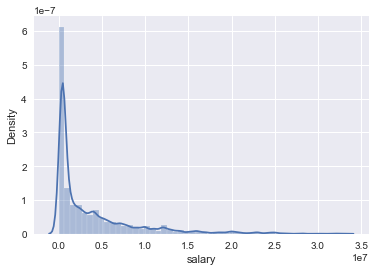

In [49]:
sns.distplot(df_people['salary'])

<AxesSubplot:xlabel='salary', ylabel='Density'>

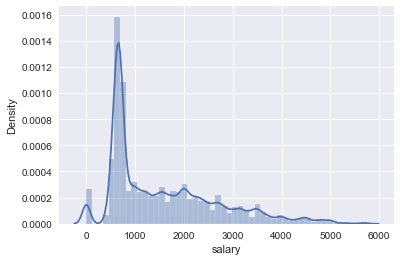

In [51]:
sns.distplot(np.sqrt(df_people['salary']))

In [52]:
df_people.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,nameFirst,nameLast,weight,height,bats,throws,debut,finalGame,award_winner,yearID_x,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,obp_num,obp_de,OBP,BA,TB,SLG,OPS,salary,prim_pos,yearID_y,W_p,L_p,G_p,GS_p,CG,SHO_p,SV_p,IPouts,ER_p,HR_p,SO_p,BAOpp,HBP_p,SH_p,SF_p,GIDP_p,ERA,WP,BK,BFP,GF,R_p,WHIP,IP,IBB_p,BB_p
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,David,Aardsma,215.0,75.0,R,R,2004-04-06,2015-08-23,0.0,2004.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300000.0,P,2004.0,1.0,0.0,11.0,0.0,0.0,0.0,0.0,32.0,8.0,1.0,5.0,0.417,2.0,0.0,1.0,1.0,6.750000,0.0,0.0,61.0,5.0,8.0,2.812500,10.666667,0.0,10.0
1,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,David,Aardsma,215.0,75.0,R,R,2004-04-06,2015-08-23,0.0,2004.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300000.0,P,2006.0,3.0,0.0,45.0,0.0,0.0,0.0,0.0,159.0,24.0,9.0,49.0,0.214,1.0,1.0,3.0,2.0,4.075472,1.0,0.0,225.0,9.0,25.0,1.301887,53.000000,0.0,28.0
2,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,David,Aardsma,215.0,75.0,R,R,2004-04-06,2015-08-23,0.0,2004.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300000.0,P,2007.0,2.0,1.0,25.0,0.0,0.0,0.0,0.0,97.0,23.0,4.0,36.0,0.300,1.0,2.0,1.0,1.0,6.402062,2.0,0.0,151.0,7.0,24.0,1.731959,32.333333,3.0,17.0
3,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,David,Aardsma,215.0,75.0,R,R,2004-04-06,2015-08-23,0.0,2004.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300000.0,P,2008.0,4.0,2.0,47.0,0.0,0.0,0.0,0.0,146.0,30.0,4.0,49.0,0.268,5.0,3.0,2.0,4.0,5.547945,3.0,0.0,228.0,7.0,32.0,1.726027,48.666667,2.0,35.0
4,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,David,Aardsma,215.0,75.0,R,R,2004-04-06,2015-08-23,0.0,2004.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300000.0,P,2009.0,3.0,6.0,73.0,0.0,0.0,0.0,38.0,214.0,20.0,4.0,80.0,0.190,0.0,2.0,1.0,2.0,2.523364,2.0,0.0,296.0,53.0,23.0,1.163551,71.333333,3.0,34.0


In [53]:
df_people.shape

(496397, 70)

In [50]:
df1 = df_people[['playerID','throws']].copy()

In [55]:
df_people['prim_pos'].value_counts()

P     446445
OF     15442
2B     10309
C       8511
1B      7494
3B      4435
SS      3744
0         17
Name: prim_pos, dtype: int64

In [56]:
df_people.drop(axis=1, columns=['birthMonth','birthState','birthCity','birthDay', 'birthCountry'],
                           inplace=True, errors='raise')

df_people = pd.get_dummies(df_people, columns=['throws'], drop_first = True)
df_people = pd.get_dummies(df_people, columns=['bats'], drop_first = True)
df_people = pd.get_dummies(df_people, columns=['prim_pos'], drop_first = True)

In [57]:
print(df_people.shape)
df_people.head()

(496397, 73)


,playerID,birthYear,nameFirst,nameLast,weight,height,debut,finalGame,award_winner,yearID_x,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,obp_num,obp_de,OBP,BA,TB,SLG,OPS,salary,yearID_y,W_p,L_p,G_p,GS_p,CG,SHO_p,SV_p,IPouts,ER_p,HR_p,SO_p,BAOpp,HBP_p,SH_p,SF_p,GIDP_p,ERA,WP,BK,BFP,GF,R_p,WHIP,IP,IBB_p,BB_p,throws_R,throws_S,bats_L,bats_R,prim_pos_1B,prim_pos_2B,prim_pos_3B,prim_pos_C,prim_pos_OF,prim_pos_P,prim_pos_SS
0,aardsda01,1981.0,David,Aardsma,215.0,75.0,2004-04-06,2015-08-23,0.0,2004.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300000.0,2004.0,1.0,0.0,11.0,0.0,0.0,0.0,0.0,32.0,8.0,1.0,5.0,0.417,2.0,0.0,1.0,1.0,6.750000,0.0,0.0,61.0,5.0,8.0,2.812500,10.666667,0.0,10.0,1,0,0,1,0,0,0,0,0,1,0
1,aardsda01,1981.0,David,Aardsma,215.0,75.0,2004-04-06,2015-08-23,0.0,2004.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300000.0,2006.0,3.0,0.0,45.0,0.0,0.0,0.0,0.0,159.0,24.0,9.0,49.0,0.214,1.0,1.0,3.0,2.0,4.075472,1.0,0.0,225.0,9.0,25.0,1.301887,53.000000,0.0,28.0,1,0,0,1,0,0,0,0,0,1,0
2,aardsda01,1981.0,David,Aardsma,215.0,75.0,2004-04-06,2015-08-23,0.0,2004.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300000.0,2007.0,2.0,1.0,25.0,0.0,0.0,0.0,0.0,97.0,23.0,4.0,36.0,0.300,1.0,2.0,1.0,1.0,6.402062,2.0,0.0,151.0,7.0,24.0,1.731959,32.333333,3.0,17.0,1,0,0,1,0,0,0,0,0,1,0
3,aardsda01,1981.0,David,Aardsma,215.0,75.0,2004-04-06,2015-08-23,0.0,2004.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300000.0,2008.0,4.0,2.0,47.0,0.0,0.0,0.0,0.0,146.0,30.0,4.0,49.0,0.268,5.0,3.0,2.0,4.0,5.547945,3.0,0.0,228.0,7.0,32.0,1.726027,48.666667,2.0,35.0,1,0,0,1,0,0,0,0,0,1,0
4,aardsda01,1981.0,David,Aardsma,215.0,75.0,2004-04-06,2015-08-23,0.0,2004.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300000.0,2009.0,3.0,6.0,73.0,0.0,0.0,0.0,38.0,214.0,20.0,4.0,80.0,0.190,0.0,2.0,1.0,2.0,2.523364,2.0,0.0,296.0,53.0,23.0,1.163551,71.333333,3.0,34.0,1,0,0,1,0,0,0,0,0,1,0


In [58]:
df_field_grouped.head()


,playerID,prim_pos
0,aardsda01,P
1,abadan01,1B
2,abadfe01,P
3,abbotco01,P
4,abbotje01,OF


In [51]:
df_people = pd.merge(df_people, df1, on='playerID',how = 'left')
df_people = pd.merge(df_people,df_field_grouped, on = 'playerID', how = 'left')
print(df_people.shape)

(20370, 26)


In [52]:
print(df_people.shape)
df_people.head()

(20370, 26)


,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws_x,debut,finalGame,retroID,bbrefID,throws_y,prim_pos
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,R,P
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,2021.0,1.0,22.0,USA,GA,Atlanta,Hank,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01,R,NaN
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,USA,GA,Atlanta,Tommie,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01,R,NaN
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,NaN,NaN,NaN,Don,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01,R,NaN
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,NaN,NaN,NaN,Andy,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01,L,1B


In [53]:
df_people.to_csv('rookie.csv')

In [55]:
df = pd.read_csv('rookie.csv')
print(df.shape)
df.head()

(20370, 27)


,Unnamed: 0,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws_x,debut,finalGame,retroID,bbrefID,throws_y,prim_pos
0,0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,R,P
1,1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,2021.0,1.0,22.0,USA,GA,Atlanta,Hank,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01,R,NaN
2,2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,USA,GA,Atlanta,Tommie,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01,R,NaN
3,3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,NaN,NaN,NaN,Don,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01,R,NaN
4,4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,NaN,NaN,NaN,Andy,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01,L,1B
